In [1]:
import numpy as np
import sympy as sp

sp.init_printing()
t1, t2 = sp.symbols('t1 t2')
def RX(params):
  params =sp.symbols(params,real=True,)
  _RX = np.array([[sp.cos(params/2),-sp.I*sp.sin(params/2)],[-sp.I*sp.sin(params/2),sp.cos(params/2)]])
  return _RX

def RY(params):
  params =sp.symbols(params ,real=True,)
  _RY = np.array([[sp.cos(params/2),-1*sp.sin(params/2)],[sp.sin(params/2),sp.cos(params/2)]])
  return _RY


def Z_3(s='IZI'):
  m_dict = {
    'Z' : np.array([[1,0],[0,-1]]),
    'I' : np.eye(2)
  }
  result = np.kron(np.kron(m_dict[s[0]], m_dict[s[1]]), m_dict[s[2]])
  return result

def pqc(layer):
  C_NOT =np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

  I_CNOT= np.kron(np.eye(2),C_NOT)
  CNOT_I= np.kron(C_NOT,np.eye(2))
  angle_embeding = np.kron(np.kron(RX('x1'),RX('x2')),np.eye(2))
  cnot_layer = I_CNOT @CNOT_I
  for i in range(layer):
    tmp=np.eye(8)
    pqc_layer =np.kron(np.kron(RY(f't{i+1}'),RY(f't{i+2}')),RY(f't{i+3}'))
    tmp = tmp@pqc_layer@cnot_layer
  tmp =tmp@cnot_layer@angle_embeding
  return tmp

In [2]:
m =RY('t4')@RX('t3')@RY('t2')@RX('t1')@RX('x')

In [5]:
ans=m@np.array([[1],[0]])

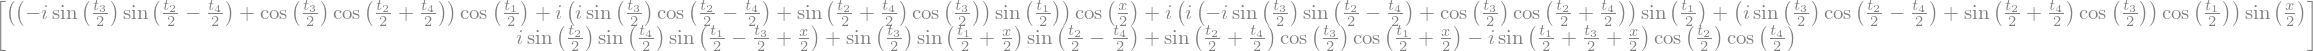

In [6]:
ans =sp.simplify(ans)
ans

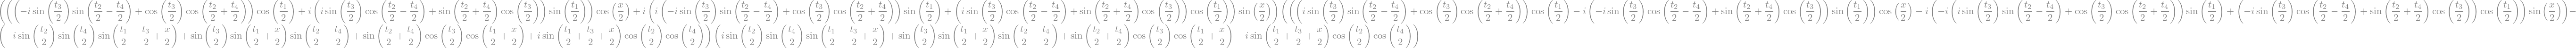

In [8]:
def compelx_square(x):
  return x*sp.conjugate(x)

k=compelx_square(ans[0][0]) - compelx_square(ans[1][0])
k

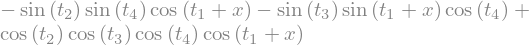

In [9]:
res=sp.simplify(k)
res

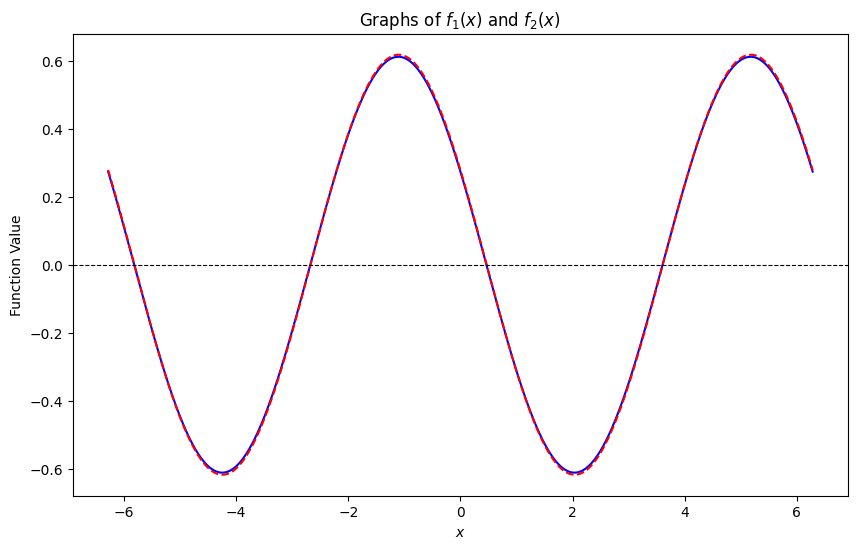

In [16]:
import matplotlib.pyplot as plt
from numpy import sin, cos
# Parameters
t1 = 0.74
t2 = -0.38
t3 = 0.26
t4 = -0.55


# Functions
f1 = lambda x: -(sin(t2) * sin(t4) * cos(t1 + x)) - (sin(t3) * sin(t1 + x) * cos(t4)) + cos(t2) * cos(t3) * cos(t4) * cos(t1 + x)
f2 = lambda x: cos(x+t1) * cos(t2 + t4) * cos(t3) - sin(x + t1) * sin(t3) * cos(t4)

# x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
# Compute y values
y1 = f1(x)
y2 = f2(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'$f_1(x) = \cos(\theta_2) \cos(x + \theta_1)$', color='blue')
plt.plot(x, y2, label=r'$f_2(x) = \frac{\cos(\theta_1 - \theta_2 + x) + \cos(\theta_1 + \theta_2 + x)}{2}$', color='red', linestyle='--')

# Customizing the plot
plt.title('Graphs of $f_1(x)$ and $f_2(x)$')
plt.xlabel('$x$')
plt.ylabel('Function Value')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y = 0
plt.axvline(0, color='black', linewidth=0)

In [19]:
ans =sp.trigsimp(pqc(3))

In [ ]:
x = np.array([1,0,0,0,0,0,0,0])
x= x.reshape(8,1)
res= ans@x

In [ ]:
x1= res.T@Z_3("ZII")@res
sp.simplify(x1)

In [ ]:
x2= res.T@Z_3("IZI")@res
sp.trigsimp(x2)

In [25]:
x3= res.T@Z_3("IIZ")@res
sp.trigsimp(x3)